### Analysing my own runs

#### Importing libraries

In [12]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Reading the data

- Get rid of unnecesary columns
- Wrangle columns and put in adequate types



In [13]:
# read the data
data_runs = pd.read_csv("C:\\Users\\JuanCarlosSaraviaDra\\Dropbox\\Garmin\\Activities_07082024.csv", sep = ";")

# Extract only the columns that will be used
data_runs = data_runs[['Activity Type', 'Date', 'Distance', 'Calories', 'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length', 'Number of Laps', 'Moving Time', 'Elapsed Time',  'Min Elevation', 'Max Elevation']]

# Filter only the usefull activities
data_runs = data_runs[data_runs['Activity Type'].str.contains("Running", na = False)]
data_runs = data_runs[~data_runs['Activity Type'].str.contains("Indoor Running", na = False)]

# Get rid of the dashes
data_runs.replace('--', np.nan, inplace=True)

# Change values into right format in this case numeric
columns = ['Distance','Calories', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Total Ascent','Total Descent', 'Avg Stride Length', 'Number of Laps', 'Min Elevation', 'Max Elevation']

# Change to numeric           
data_runs[columns] = data_runs[columns].apply(pd.to_numeric, errors='coerce', axis = 1)

# Get the values for date format
columns_date_time = ['Date', 'Time', 'Moving Time', 'Elapsed Time']

# Change to datetime
data_runs[columns_date_time] = data_runs[columns_date_time].apply(pd.to_datetime, format = 'mixed',
                                                                  errors='coerce', axis = 1)

# Change type Pace for minutes and seconds
columns_Pace = ['Avg Pace', 'Best Pace']

# Change to minutes and seconds
data_runs[columns_Pace] = data_runs[columns_Pace].apply(pd.to_datetime, format = '%M:%S', errors = 'coerce',
                                                        axis = 1) 


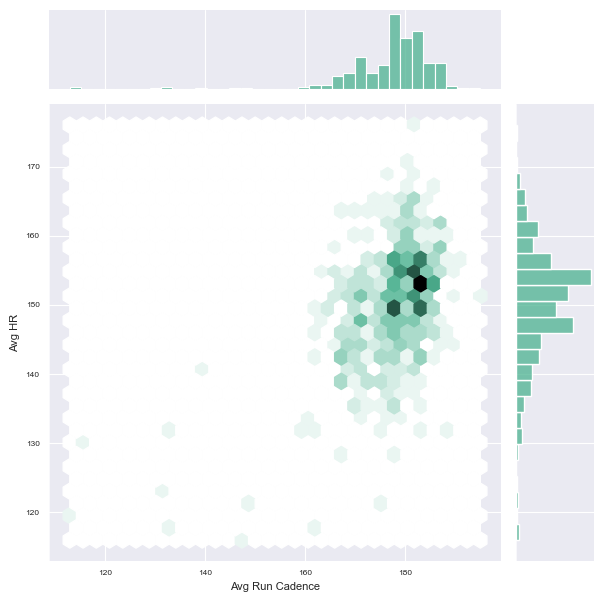

In [14]:
sn.jointplot(x="Avg Run Cadence", y="Avg HR",
             data= data_runs, kind="hex", color="#4CB391")

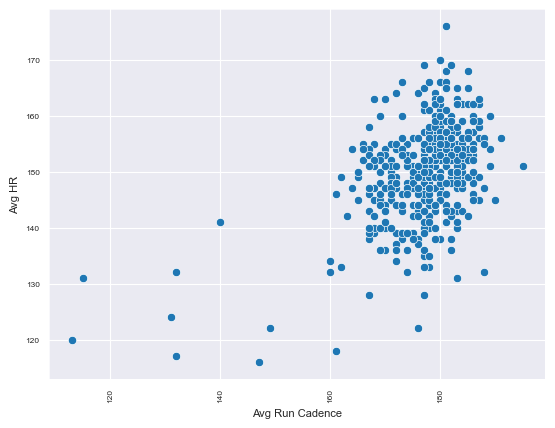

In [16]:
ax = sn.scatterplot(x="Avg Run Cadence",
                    y="Avg HR",
                    data=data_runs)
ax.tick_params(axis='x', labelrotation=90)

<Axes: xlabel='Avg Stride Length', ylabel='Avg HR'>

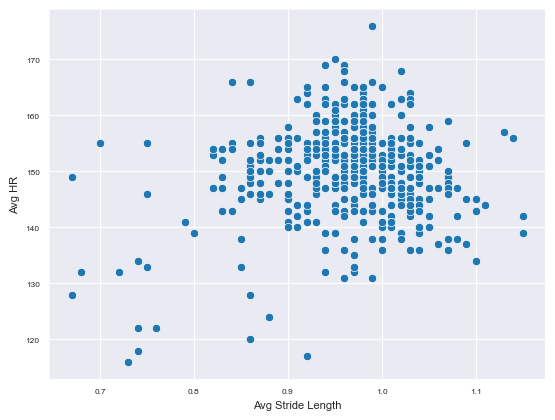

In [17]:
sn.scatterplot(x="Avg Stride Length",
                    y="Avg HR",
                    data=data_runs)

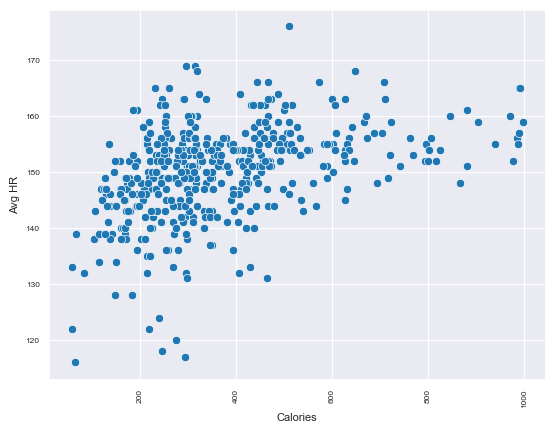

In [18]:
ax2 = sn.scatterplot(x="Calories",
                    y="Avg HR",
                    data=data_runs)
ax2.tick_params(axis='x', labelrotation=90)

### Contour plot needs to be revised

In [ ]:

# Create a pivot table to reshape Z
pivot_table = data_runs.pivot_table(index='Avg HR', columns='Avg Run Cadence', values='Calories')

# Create the meshgrid from the pivot table's index and columns
X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)

# Z values are the reshaped 'Calories' data
Z = pivot_table.values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Now plot the surface and contour
ax.plot_surface(X, Y, Z, cmap='coolwarm', rstride=1, cstride=1, alpha=0.2)
ax.contour(X, Y, Z, levels=60, linestyles='solid', alpha=0.9, antialiased=True)

plt.show()
